# Síntesis de algunas funciones RLC
<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
bla.
* Funciones de dibujo de redes: [dibujar_foster_serie](), [dibujar_foster_derivacion](), [dibujar_cauer_RC_RL]()
* Funciones de síntesis de dipolos: [cauer_RC](), [foster](), [foster_zRC2yRC]()
* Funciones para presentación de markdown y latex: [print_latex](), [print_subtitle](), [a_equal_b_latex_s]()


### Introducción

Concluye la sección de síntesis de funciones de excitación dejando algunas pautas para resolver la síntesis de redes R-L-C. Como se explicó en los documentos anteriores para las redes compuestas por dos elementos diferentes, habrá que prestar especial atención en todos los pasos de la síntesis de que la inmitancia remanente no pierda su **condición de ser realizable**, es decir que sea FRP. 

Se presentan a continuación algunos ejemplos orientados a resolver ciertos problemas especialmente útiles al momento de sintetizar **transferencias cargadas**. Se remite al lector interesado en métodos sistemáticos a la [bibliografía](https://en.wikipedia.org/wiki/Network_synthesis) (Brune, Bott-Duffin, Miyata, etc.)

Se inicializa el entorno de trabajo para comenzar con el primer ejemplo

In [1]:

import sympy as sp

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_infinito, isFRP
from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

from pytc2.sintesis_dipolo import cauer_RC, foster, foster_zRC2yRC
from pytc2.dibujar import dibujar_cauer_RC_RL, dibujar_foster_derivacion, dibujar_foster_serie
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown


#### Ejemplo 1:

Sea la siguiente función de impedancia:


In [2]:
# Resolución simbólica
s = sp.symbols('s ', complex=True)

# Sea la siguiente función de excitación
ZZ = (s**2 + 2*s + 2)/(s**2 + 1*s + 1)

print_subtitle('Impedancia $Z_{RLC}$ ')

print_latex(a_equal_b_latex_s('Z_{RLC}(s)', ZZ))


#### Impedancia $Z_{RLC}$ 

<IPython.core.display.Math object>

In [3]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, ZRLC_foster = foster(ZZ)

print_subtitle('Expansión Foster de $Z_{RLC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Z_{RLC}(s)', ZZ)[1:-1], ZRLC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))



#### Expansión Foster de $Z_{RLC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
# Se expande ZRC a la Foster
k0, koo, ki_wi, kk, YRLC_foster = foster(1/ZZ)

print_subtitle('Expansión Foster de $Y_{RLC}$ ')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('Y_{RLC}(s)', 1/ZZ)[1:-1], YRLC_foster ))

print_latex(a_equal_b_latex_s('k_0', k0))

print_latex(a_equal_b_latex_s(r'k_1', ki_wi ))

print_latex(a_equal_b_latex_s('k_k', kk))


#### Expansión Foster de $Y_{RLC}$ 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

como se puede apreciar, ninguna de las formas Foster pareciera llegar a buen puerto para la síntesis, probaremos con Cauer finalmente



#################################
# Fallo la remoción en infinito #
#################################

Se intentó remover el valor:


<IPython.core.display.Math object>



######################
# Fallo la expansión #
######################



<IPython.core.display.Math object>

#### Implementación escalera de $Z_{RLC}$ e $Y_{RLC}$

<IPython.core.display.Math object>

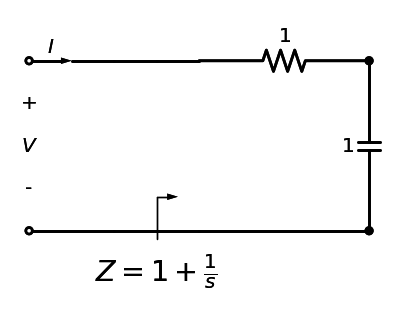

<IPython.core.display.Math object>

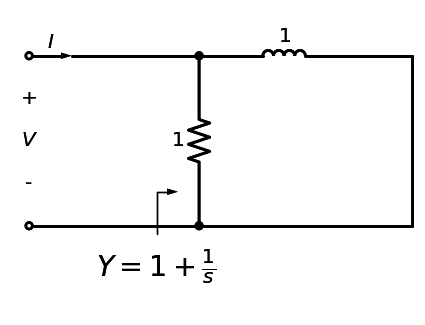

In [5]:
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import display, dibujar_cierre, dibujar_puerto_entrada, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, Inductor

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, ZZ_cauer_oo, rem = cauer_RC(ZZ, remover_en_inf=True)

print_subtitle('Implementación escalera de $Z_{RLC}$ e $Y_{RLC}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RLC}(s)', ZZ)[1:-1], ZZ_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = ZZ_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RLC}(s)', ZZ)[1:-1], ZZ_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = ZZ_cauer_oo)



Las formas canónicas no han servido de mucho como era de esperarse. Se procede ahora con una metodología NO canónica, basada simplemente en realizar remociones cuidando que la función resultante no **se rompa**, es decir, deje de ser FRP. Se comienza con la función original:

In [6]:
isFRP(ZZ)

True

Obviamente la función original es FRP. Luego se comienza por analizar el comportamiento de la función en ambos extremos y evaluar la red que resulta luego de la remoción. Tanto en 0 como infinito la red se comporta resistivamente. Ahora conviene evaluar el valor de cada tendencia en los extremos, y saber que solo puede removerse **el menor valor**. Para este caso el límite lo impone el valor en infinito:

In [7]:
Z2, R1 = remover_valor_en_infinito(ZZ)

Si fuese correcto el camino elegido, Z2 debería seguir siendo FRP:

In [8]:
str_si_o_no = ['No', 'Si']

print( 'La función Z2 es FRP? {:s}'.format(str_si_o_no[isFRP(Z2)]) )

print_latex(a_equal_b_latex_s('Z_2(s)', Z2))


La función Z2 es FRP? Si


<IPython.core.display.Math object>

Procedemos a analizar la siguiente remoción sobre Z2. En este caso encontramos un comportamiento capacitivo en infinito (cero de impedancia), y el resistivo en DC. Evidentemente, ya no podemos retirar nada salvo el capacitor que se evidencia en infinito. Para ello, invertimos y removemos:

In [9]:
Y4, Y3 = remover_polo_infinito(1/Z2)

C1 = Y3/s

Ya obtenido C1, repetimos el paso anterior: analizamos Y4 y procedemos a dar el siguiente paso:

In [10]:
print( 'La función Y4 es FRP? {:s}'.format(str_si_o_no[isFRP(Y4)]) )

print_latex(a_equal_b_latex_s('Y_4(s)', Y4))


La función Y4 es FRP? Si


<IPython.core.display.Math object>

Ahora está mucho más claro, e identificamos que en Z4 solo restan un inductor y un resistor

In [11]:
Z6, Z5 = remover_polo_infinito(1/Y4)

L1 = Z5/s

R2 = Z6

Con esto finalizamos la síntesis y procedemos a visualizar la red resultante

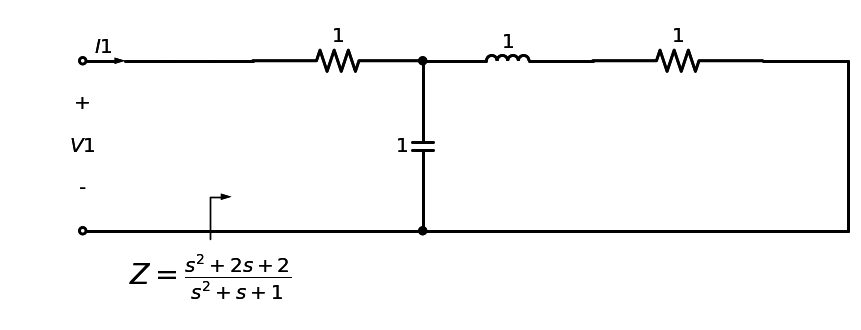

In [12]:
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V1$', '-'), 
                        current_lbl = '$I1$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, R1)

d = dibujar_elemento_derivacion(d, Capacitor, C1)

d = dibujar_elemento_serie(d, Inductor, L1)

d = dibujar_elemento_serie(d, Resistor, R2)

d = dibujar_cierre(d)

display(d)

Cabe la pregunta ahora, ¿podría haberse tomado otro camino durante la síntesis?

Por ejemplo, ¿podríamos retirar un inductor unitario primero?

In [14]:
Z2x = ZZ - s

print( 'La función Z2x es FRP? {:s}'.format(str_si_o_no[isFRP(Z2x)]) )


La función Z2x es FRP? No


Evidentemente **no** ¿y un capacitor?

In [15]:
Z2x = ZZ - 1/s

print( 'La función Z2x es FRP? {:s}'.format(str_si_o_no[isFRP(Z2x)]) )


La función Z2x es FRP? No


**Tampoco es posible**. Esto debería servir para enfatizar la importancia del orden en las remociones. En muchas síntesis RLC, se tiene cierta información previa sobre la topología circuital. Por ejemplo, en una síntesis RLC de una red doblemente cargada, se sabe que primero y último están los componentes resistivos. Al seguir este orden, se pueden realizar síntesis exitosas.

### Implementación de  FE con inductores

Ahora presentamos las versiones equivalentes de las FE disipativas analizadas hasta ahora

In [13]:
print_subtitle('Implementación circuital $Y_{RC}$ como $Z_{RL}$')

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_serie(k0, koo, ki_wi, kk, z_exc = YRC_foster)


#### Implementación circuital $Y_{RC}$ como $Z_{RL}$

NameError: name 'YRC_foster' is not defined

In [ ]:
print_subtitle('Implementación circuital $Z_{RC}$ como $Y_{RL}$')

k0, koo, ki_wi, kk, ZRC_foster = foster(ZRC)

# Tratamos a nuestra función imitancia como una Y
dibujar_foster_derivacion(k0, koo, ki_wi, kk, y_exc = ZRC_foster)


### Expansión en fracciones continuas: Método de Cauer

Del mismo modo que el método de Foster se sutenta en la expansión en fracciones simples, el de Cauer consiste en la expansión en [fracciones continuas](https://en.wikipedia.org/wiki/Network_synthesis#Cauer_synthesis). En el caso de FE disipativas, se realizará la expansión mediante los residuos $k_0$, $k_\infty$ y $k_K$, dependiendo si se expande una $Z_{RC}$ o una $Y_{RC}$:

$$ Z_{RC}(s)= \frac{1}{s.C_1} + \frac{1}{ \frac{1}{R_1} + \frac{1}{ \frac{1}{s.C_2} + \cdots } } = 
         R_1 + \frac{1}{ s.C_1 + \frac{1}{ R_2 + \cdots } } $$

$$ Y_{RC}(s)= s.C_1 + \frac{1}{ R_1 + \frac{1}{ s.C_2 + \cdots } } = 
         \frac{1}{R_1} + \frac{1}{ s.C_1 + \frac{1}{ \frac{1}{R_2} + \cdots } } $$

se ve claramente como sendas funciones de inmitancia, se corresponden con 2 redes diferentes, dependiendo dónde se realicen las remociones. Se darán ejemplos en los siguientes paneles.



## Cauer 1: remociones en $\infty$

Se comienza con la primera forma del método, es decir cuando se realizan remociones de los residuos en infinito.

In [ ]:
from pytc2.sintesis_dipolo import cauer_RC
from pytc2.dibujar import dibujar_cauer_RC_RL

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, ZRC_cauer_oo, rem = cauer_RC(ZRC, remover_en_inf=True)

print_subtitle('Implementación escalera de $Z_{RC}$ e $Y_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RC}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = ZRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RL}(s)', ZRC)[1:-1], ZRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = ZRC_cauer_oo)



Se observa, como es de esperarse, que interpretar la inmitancia como impedancia o admitancia utilizando Cauer 1, da lugar a redes **duales**. Sin embargo en ambos casos se observan transferencias pasabajo (respecto a un posible puerto de salida en el extremo derecho de la red), ya que se obtienen inductores en serie y capacitores en derivación.

## Cauer 2: remociones en 0 o DC

Repetimos ahora para remociones de los residuos en 0 Hz, obtendremos dos redes también duales.

In [ ]:

# Implementaremos FF mediante Cauer 1 o remociones continuas en infinito
koo, YRC_cauer_oo, rem = cauer_RC(YRC, remover_en_inf=False)

print_subtitle('Implementación escalera de $Y_{RC}$ y $Z_{RL}$')

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Y_{RC}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Z
dibujar_cauer_RC_RL(koo, z_exc = YRC_cauer_oo)

print_latex(a_equal_b_latex_s(a_equal_b_latex_s('$ Z_{RL}(s)', YRC)[1:-1], YRC_cauer_oo ))

# Tratamos a nuestra función inmitancia como una Y
dibujar_cauer_RC_RL(koo, y_exc = YRC_cauer_oo)


Ambas redes duales, tienen características en común como ser que ambas tienen capacitores en serie e inductores en derivación. Esto contrasta con las redes halladas mediante Cauer 1, donde observamos lo contrario: inductores en serie y capacitores en derivación. Está claro que Cauer 1 da lugar a redes que, en caso **que imaginemos un puerto de salida en el extremo derecho de la red**, serían filtros **pasabajo**, mientras que sintetizar una red mediante Cauer 2 da lugar a una red escalera **pasa-altos**.
